<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



# About the data

The final movies.cvs file came from reading an join SQL query relational database tables into a pandas dataframe by using read_sql_query function to excute the query to retrieve data from the joined tables. Then save the dataframe to movies.csv file through to_csv method. Finally, use the files.download method from google.colab to download the csv file.



### Entity Relationship (ER) Diagram of Movie Database (IMDb)
---

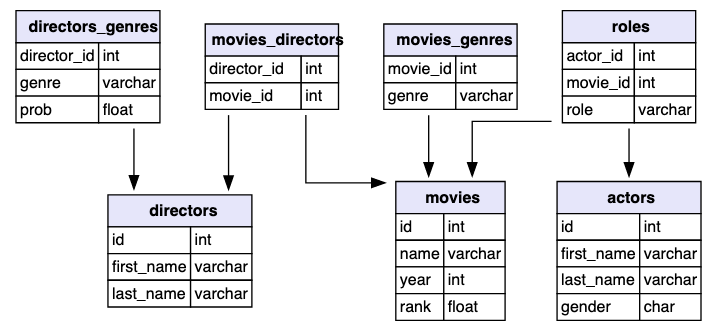


### Connecting the mysql database

First of all, we need to install mysql.connector in colab. 

In [23]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

Using mysql.connector's method connect to link to mysql imdb_ijs database by passing the configuration info. 

In [24]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

execute_query function will be able to excute query to retrieve information from the database we've linked to. 

In [25]:
# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None


The example below is excuting a query "SHOW TABLES" and use a for loop to show all the tables from the database and the number of records in each table. 



In [26]:
# run a query using the execute query function 
# show the tables in the database
all_tables = execute_query("SHOW TABLES")
for each_table in all_tables:
  # the number of records in each of the tables
  rows_table = execute_query("SELECT COUNT(*) from "+ each_table[0])
  print(each_table[0], "=", rows_table[0])

actors = (817718,)
directors = (86880,)
directors_genres = (156562,)
movies = (388269,)
movies_directors = (371180,)
movies_genres = (395119,)
roles = (3431966,)


In [27]:
# I can use for loop to write the data into a csv
movies_query = "SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id"
# movies_records = execute_query(movies_query)
# for each_movie in movies_records:
  # print(each_movie[0],' ',each_movie[1], ' ', each_movie[2] )
  

### Reading SQL database into python pandas

The final movies.cvs file came from reading an join SQL query relational database tables into a pandas dataframe by using read_sql_query function to excute the query to retrieve data from the joined tables. Then save the dataframe to movies.csv file through to_csv method. Finally, use the files.download method from google.colab to download the csv file to your local directory. In my case, it downloaded to my download folder.

In [3]:
import pandas as pd
from google.colab import files

In [ ]:
# Use pandas .read_sql_query() function to excute the query and return the dataframe. 
# Also, save the records into a dataframe variable and save to a csv file. 
# Also use google.colab files library to download the file to local directory.
def get_movies_data():
  query = "SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id"

  df = pd.read_sql_query(query, mydb)
  df.to_csv('movies.csv')
  files.download('movies.csv')
  return df

In [28]:
# This code will test if your movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


,first_name,last_name,name,year,rank,genre
0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


Reading the downloaded csv file

In [ ]:
from google.colab import files
import io

In [29]:
def get_data():
  !rm movies.csv
  # upload a set of chosen files then read a specified file
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
  return df 

mov_data = get_data()

Saving movies.csv to movies.csv


### Read cvs from a url into Python pandas 
You can also read the row csv file directly from the link below through pandas read_csv() function by passing in the github url.

In [7]:
def get_data_url(url):
  df = pd.read_csv(url) #,skiprows = 1)
  return df 



#program starts here
url= "https://github.com/sysphcd/PythonProgrammingforData/blob/main/Datasets/movies.csv?raw=true"
# url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = get_data_url(url)


### Inspect & Explore the dataset 
---

A copy of movies.csv is saved in https://github.com/sysphcd/PythonProgrammingforData/blob/main/Datasets/movies.csv. You will be able to have a look what the data looks like. 

In the get_date function, I use files.upload() and io.BytesIO() functions to chose the the file to upload. Then use pandas read_csv() function to read the csv file and save in a dataframe variable.

Get some simple stats

In [8]:
print(df.describe()) #Showing Basics Statistics

          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max    368893.000000    2007.000000       9.900000


See the summary of the dataframe

In [9]:
df.info()  #Displaying Data Types
# print(df.columns) #Displaying fields
# print(df.head()) #Displaying first 5 rows
# print(df['name']) #Displaying column name records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


In [21]:
# count the number of rows for rank
df['rank'].value_counts()

6.6    3364
6.2    3333
6.5    3201
6.4    3179
6.3    3109
       ... 
9.7      87
1.3      61
9.9      55
1.1      51
1.2      36
Name: rank, Length: 90, dtype: int64

### Clean and formate the dataset 
---


Let's make a copy of the original dataset and working on the copy one. Remove duplicated rows from the dataframe

In [22]:
movie_df = df.copy()
movie_df.drop_duplicates()
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None


There are some null values founded in rank column. After removing null values by using dropna() function, now the number of records has reduced. I named the dataframe to a new name. 


In [23]:
movie_df = movie_df.dropna()
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB
None


Merge first_name and last_name columns to director_name column and remove first_name and last_name columns. Rename the column 'Unnamed: 0' to id

In [24]:
movie_df['director_name'] = movie_df['first_name'].map(str) + ' ' + movie_df['last_name'].map(str)
cleaned_df = movie_df.drop(columns=['first_name','last_name'])
cleaned_df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
   
cleaned_df.head()

,id,name,year,rank,genre,director_name
77,77,Cleaning Up!,2002,8.3,Documentary,Rostislav Aalto
78,78,Is meidn,1993,6.8,Drama,Veikko Aaltonen
79,79,Juoksuhaudantie,2004,6.3,Comedy,Veikko Aaltonen
80,80,Juoksuhaudantie,2004,6.3,Drama,Veikko Aaltonen
81,81,Maa,2001,6.0,Documentary,Veikko Aaltonen


In [ ]:
# def clean_dataset(df):
#   #removing duplicate rows
#   #df.drop_duplicates()
  
#   unique_movies_df = df.copy().drop_duplicates(subset = ['name', 'last_name','first_name','year'])
#   #stripped_df = string.strip()
#   df_obj = unique_movies_df.select_dtypes(['string'])
#   # print (df_obj)
#   unique_movies_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
#   # print (unique_movies_df)
#   #df[0] = df[0].str.strip()
  
#   unique_movies_df.rename(columns={"Unnamed: 0": "id", "name": "movieName"},inplace=True)
#   unique_movies_df.info()
#   return unique_movies_df

# #removing records with missing or null data (NaN, NA, "")
#   #print(df.isnull().values.any())
#   #print(df["genre"].isnull().values.any())
#   #df.dropna(subset = ["rank"])
#   #df.dropna()
#   #removed_nullrank_df = df[~df["rank"].isnull()]

# cleaned_df = clean_dataset(df)

Let's have a look what the data look like to get a generaal idea. 

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Figure size 1080x576 with 0 Axes>

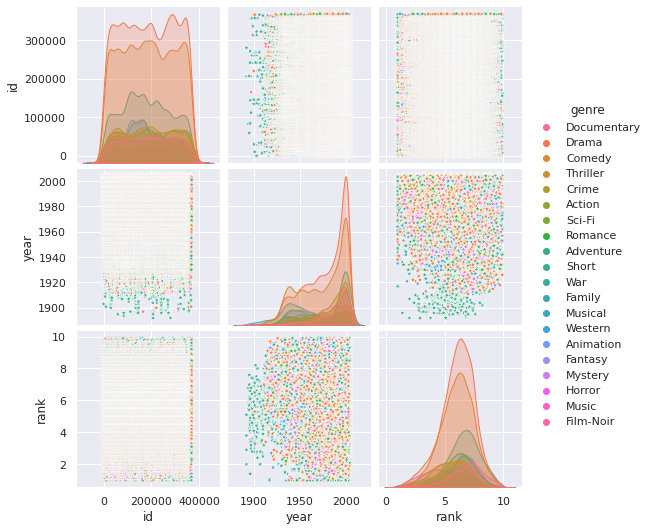

In [130]:
# Reference this from https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette('hls',8) 
plt.figure(figsize = (15,8))
bi_var_plot = sns.pairplot(cleaned_df, hue="genre",diag_kind="kde", markers='*'); #Using markers and pair plotting from https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style("darkgrid")
plt.show()

In [100]:
# Number of films by year and genre
unique_genres = cleaned_df['genre'].unique()
films_count_by_yeargenre = cleaned_df.groupby(['year','genre'])['name'] \
                             .count() \
                             .reset_index(name='count') 
                            #  .sort_values(['count'], ascending=False) \
                            #  .head(10)
print(films_count_by_yeargenre)

      year        genre  count
0     1892    Animation      3
1     1892       Comedy      1
2     1892  Documentary      1
3     1892      Romance      1
4     1892        Short      4
...    ...          ...    ...
1815  2004       Sci-Fi     41
1816  2004        Short    148
1817  2004     Thriller    153
1818  2004          War     20
1819  2004      Western      5

[1820 rows x 3 columns]


In [140]:
films_count_by_yeargenre = cleaned_df[cleaned_df['year'] >= 1990].groupby(['year','genre'])['name'].count().unstack().fillna(0)
films_count_by_yeargenre

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1990,175,60,41,295,89,67,388,45,35,150,8,15,9,71,65,57,112,28,7
1991,147,53,50,350,69,63,426,45,48,83,21,19,17,91,57,88,106,14,9
1992,181,52,52,322,66,112,403,37,38,89,19,19,21,94,47,97,137,15,4
1993,180,49,47,325,70,86,449,62,56,80,14,19,26,95,53,100,130,15,11
1994,203,68,46,384,63,135,499,57,54,88,21,17,26,112,63,149,187,15,19
1995,193,63,65,366,72,161,572,63,44,84,13,22,33,138,79,189,197,22,12
1996,213,64,68,462,95,136,630,67,50,82,21,21,35,148,86,229,214,18,6
1997,219,60,68,508,120,189,690,78,49,96,21,38,47,204,85,269,218,22,2
1998,198,97,104,583,121,184,769,81,43,103,37,24,58,215,75,349,225,26,6


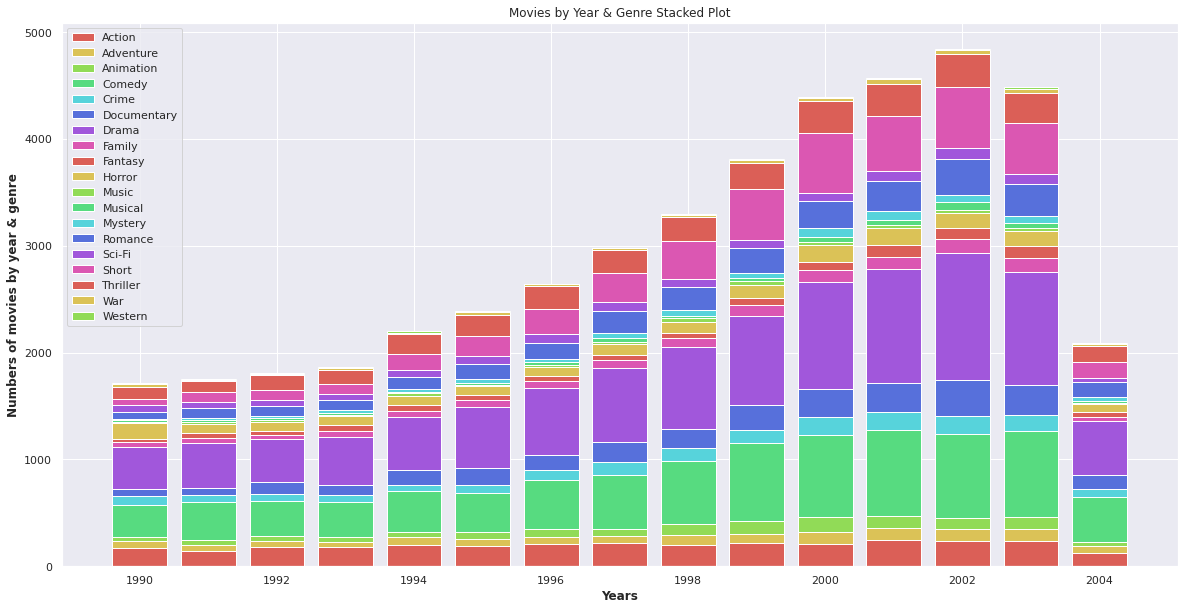

In [141]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(films_count_by_yeargenre))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(films_count_by_yeargenre.columns):
  ax.bar(films_count_by_yeargenre.index, films_count_by_yeargenre[col], bottom=bottom, label=col)
  bottom += np.array(films_count_by_yeargenre[col])

ax.set_xlabel('Years', fontweight ='bold')
ax.set_ylabel('Numbers of movies by year & genre', fontweight ='bold')
ax.set_title('Movies by Year & Genre Stacked Plot')
ax.legend()

From this visualization, it is a bit overwhelming to see all of the different colors from the many genres that are included in this analysis. You can see the amount of genres jumps in 2002. That could be from the amount of genres used to describe movies and not the total amount of movies itself. And most movies are moving in line through the years through 2002 when they all jump in size. Overall the visualization doesn’t tell us too much about the genres and movies in the past 10 years.

### How many movies of each genre are there?
---

In [28]:
# A function to calculate the row of a 
def count_rows_col(df,column):
  value_count_df = df[column].value_counts()
  return value_count_df

# the data has been drop duplicates and nan values
movie_genre_count = count_rows_col(cleaned_df, 'genre')   
print(movie_genre_count)

Drama          24696
Comedy         20633
Short           9894
Action          5873
Romance         5476
Thriller        5440
Family          4845
Animation       4727
Crime           4488
Documentary     4296
Horror          4227
Adventure       3932
Sci-Fi          2699
Musical         2491
Western         2364
Fantasy         2123
Mystery         2012
War             1837
Music            908
Film-Noir        415
Name: genre, dtype: int64


### Plot a pie chart of how many movies of each genre there are 
---
Visualise movies numbers of each genre with seaborn Pie chart

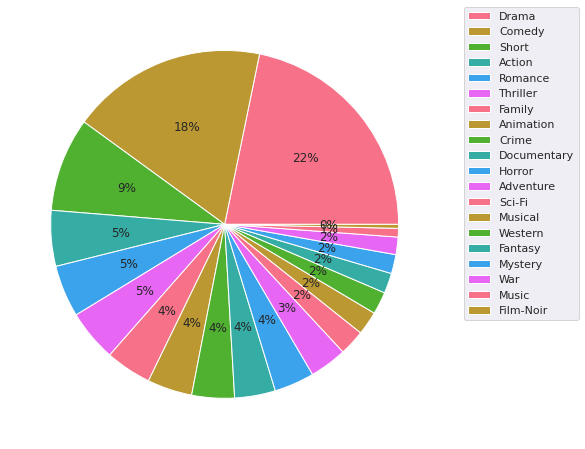

In [37]:
def draw_pie_plot(x,y):
  plt.figure(figsize = (10,8))
  sns.set(style="darkgrid")
  colors = sns.color_palette('husl')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return

x = movie_genre_count.keys()
y = movie_genre_count
draw_pie_plot(x,y)

### Which director has the highest ranked movies?
---
Found the highest rank. filt out the rows with the highest rank. count the number of row group by director_name. Sort by from high to low.

In [41]:
small_df = cleaned_df[['director_name','name', 'rank']]
max_rank = small_df['rank'].max()
result_df = small_df[(small_df['rank'] >= max_rank)]
best_directors_df = result_df.groupby(['director_name']).count()
sorted_best_directors_df = best_directors_df.sort_values(by = ["name"], ascending = False)
hightranked_director = sorted_best_directors_df.index[0]
print(hightranked_director,"has the highest ranked movies.")

Carole Roussopoulos has the highest ranked movies.


### How many movies have ranks of over 9?
---


In [57]:
cleaned_df.drop_duplicates('name')
movie_df = cleaned_df[['name','rank']]
filt_over9 = movie_df['rank'] > 9
result_df = movie_df[filt_over9][['name','rank']]
print(result_df['name'].count(),' movies ranks over 9 ')
print(result_df)

1483  movies ranks over 9 
                              name  rank
747                        brio, O   9.2
754                 Burying Dvorak   9.2
755                 Burying Dvorak   9.2
1786                     Cachorros   9.2
1787                     Cachorros   9.2
...                            ...   ...
368210  Vozvrashcheniye Domovyonka   9.6
368211  Vozvrashcheniye Domovyonka   9.6
368486        Heureux anniversaire   9.2
368487        Heureux anniversaire   9.2
368620                     Travail   9.8

[1483 rows x 2 columns]


### Plot a bar chart of mean rank and genre
---

The average rank of each genre

In [58]:
cleaned_df = cleaned_df.dropna(subset = ["rank"])
rank_mean_by_genre_df = cleaned_df.groupby('genre')['rank'].mean()
print(rank_mean_by_genre_df)

genre
Action         5.365895
Adventure      5.619379
Animation      6.553628
Comedy         5.923196
Crime          5.861007
Documentary    6.659544
Drama          6.146169
Family         6.323344
Fantasy        5.882289
Film-Noir      6.702892
Horror         4.738325
Music          6.458921
Musical        6.109916
Mystery        5.941501
Romance        6.171457
Sci-Fi         5.015858
Short          6.533778
Thriller       5.522776
War            6.430539
Western        5.665567
Name: rank, dtype: float64


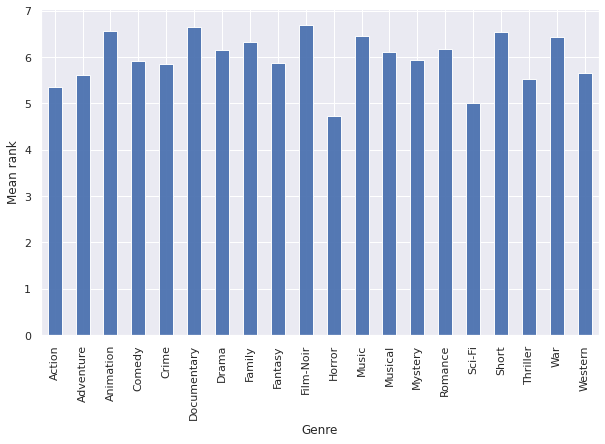

In [59]:
def draw_bar_plot(x,y,xl,yl):
  plt.figure(figsize = (10,6))
  bar_plot = y.plot(x=x, y=y, kind="bar", alpha=0.95, rot=90)
  bar_plot.set_xlabel(xl)
  bar_plot.set_ylabel(yl)
  plt.show()
  return 
x = rank_mean_by_genre_df.keys()
y = rank_mean_by_genre_df
xl = "Genre"
yl = "Mean rank"
draw_bar_plot(x,y, xl, yl)

### Plot a graph showing the mean Rank for each year 

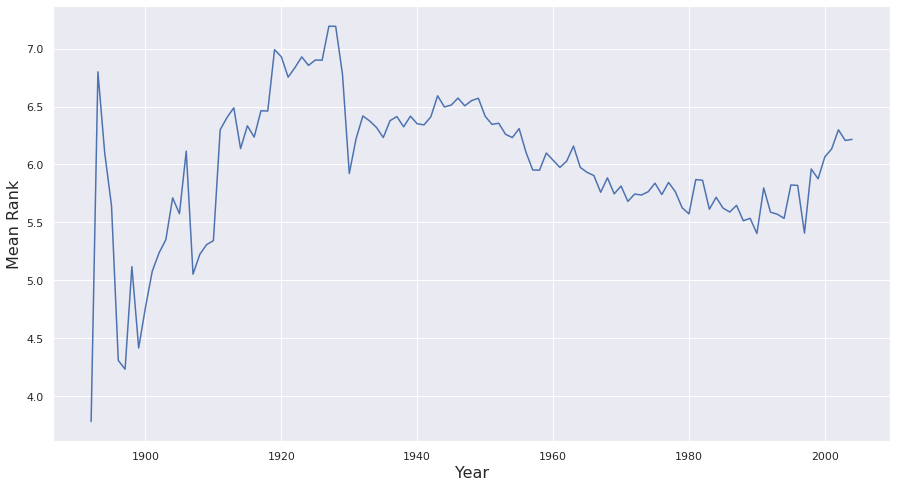

In [63]:
# Use Seaborn to draw a lineplot 
def draw_line_plot(x, y, xl,yl):
  plt.figure(figsize = (15,8))
  chart = sns.lineplot(x=x, y=y)
  chart.set_xlabel(xl, size=16)
  chart.set_ylabel(yl, size=16)
  plt.show()
  return

dorpna_df = cleaned_df.dropna(subset = ["rank"])
groupedyear_df = dorpna_df.groupby('year')
meanrank_data = dorpna_df.groupby(['year'])['rank'].mean()
# print(meanrank_data)
labels = meanrank_data.keys()
draw_line_plot(labels, meanrank_data, 'Year', 'Mean Rank')



### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1. Genre median makes each year  
2. How many films made each year & the highest
3. Top 10 directors who produced the most films

### Complete the tasks you have set out in the exercise above. 
---


### 1. Genre median makes each year  

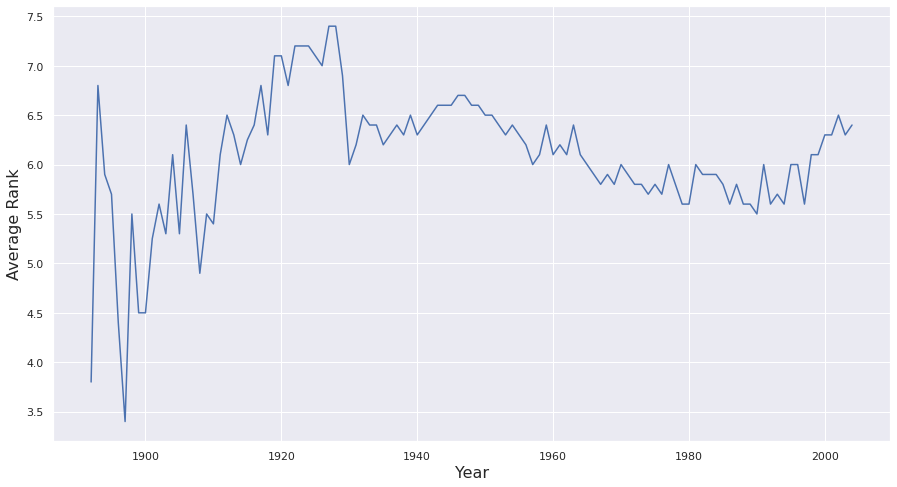

In [68]:
# genre median make each year
rank_median_year = cleaned_df.groupby('year')['rank'].median()
labels = rank_median_year.keys()
draw_line_plot(labels,rank_median_year,"Year","Average Rank")

### 2. How many films made each year & the highest

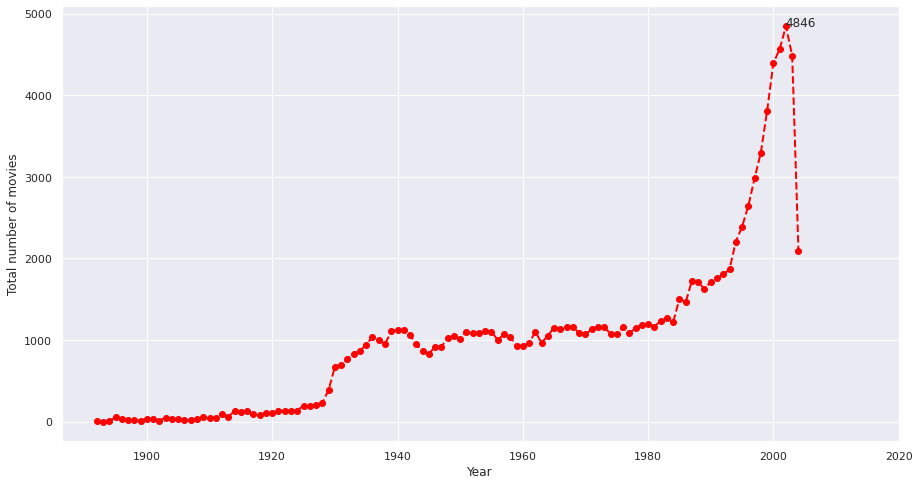

In [76]:
# how many films made each year & the highest 
# cleaned_df.groupby(['id','director_name','name','year','rank'])['genre'].apply(list).to_frame().rename(columns={0:'genres'})
import matplotlib.ticker as ticker

def draw_lineplot_with_ticks(x,y,x_label,y_label,ticks,max_val,label1):
  plt.figure(figsize = (15,8))  # fix the plot size large enough to see the years clearly
  plt.plot(year, movie_year,'go-', color='red', marker='o', linestyle='dashed', linewidth=2) # plot red line with dots
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(year)
  plt.xticks(ticks) #, rotation=90) # add specified tick labels to the x-axis
  plt.grid() # show axes grid to better visuals
  ax = plt.gca() #To get the current  axes on the current figure
  ax.annotate(label1, xy=(2002,max_val)) # annotate the maximum value
  plt.grid()
  plt.show()
  return

movie_by_year = cleaned_df.groupby('year')["name"].count()
year = np.array(movie_by_year.keys())
movie_year = np.array(list(movie_by_year))
ticks = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
max_val = cleaned_df.groupby('year')["name"].count().max() # find the maximum 
label1 = "{:.0f}".format(max_val)

draw_lineplot_with_ticks(year, movie_year, "Year", "Total number of movies", ticks, max_val, label1)

### 3. Top 10 directors who produced the most films

In [94]:
# how many films made by each director
# director_films_count = cleaned_df.groupby(['director_name'])['name'].count()
# for index, value in director_films_count.items():
#     print(f"{index} -  {value}")
# Top 10 directors produced the most films
director_films_count = cleaned_df[['director_name']].groupby(['director_name'])['director_name'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
print(director_films_count)

           director_name  count
6418        Friz Freleng   1025
3380     Chuck (I) Jones    984
4102      Dave Fleischer    738
17742    Robert McKimson    697
20067          Tex Avery    509
21429  William (I) Hanna    492
10687     Joseph Barbera    485
17628    Robert Clampett    330
8604         Jack Kinney    257
8554     Jack (I) Hannah    253


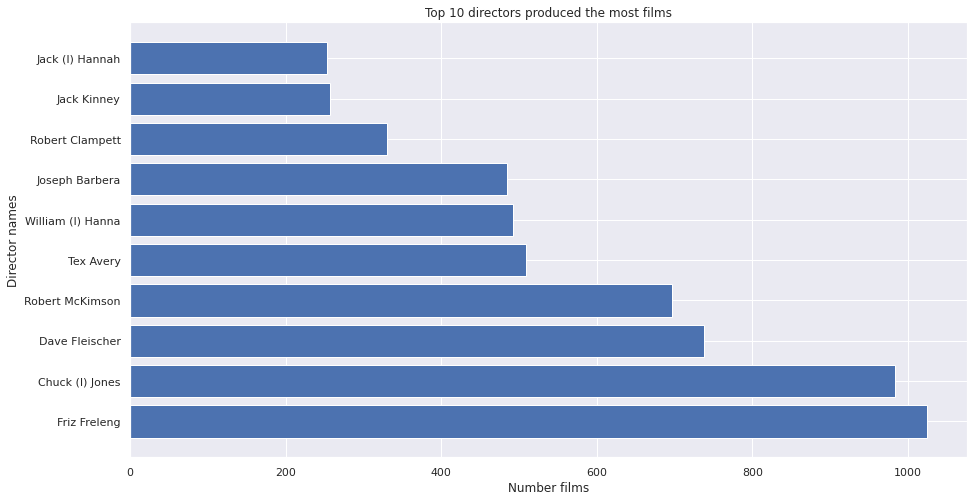

In [97]:
def draw_bar_h_plot(x,y,xl,yl, title):
  plt.figure(figsize = (15,8))
  # bar_plot = y.plot(x=x, y=y, kind="bar", alpha=0.95, rot=90)
  # bar_plot.set_xlabel(xl)
  # bar_plot.set_ylabel(yl)
  # plt.show()

  plt.barh(y,x)
  plt.title(title)
  plt.ylabel(yl)
  plt.xlabel(xl)
  plt.show()
  return 

y_axis = director_films_count['director_name']
x_axis = director_films_count['count']

# x = rank_mean_by_genre_df.keys()
# y = rank_mean_by_genre_df
xl = "Number films"
yl = "Director names"
draw_bar_h_plot(x_axis,y_axis, xl, yl, 'Top 10 directors produced the most films')

# Conclusion:


The stand out things I have found through the coded analysis are 
Overall, I think there are some interesting visualizations that were produced through the coded analysis that can show some insight into the data that would be hard to uncover by just looking at the data without visualizations. If there were additional columns to the these movies, such as months/days, you could see seasonality of when the most popular movies are put out into the theaters.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:
I have demostrated the skills of retrieving data , cleaning, describing data, 
import the necessary libraries, filtering, extracting data , calculating simple statistic, and generating charts with matplotlib or seaborn.

## What caused you the most difficulty?

Your answer:

The most difficult part is cleaning data properly and use correct syntax to extract dataframes. Also, use the formate the dataset for generating charts. 